<a href="https://colab.research.google.com/github/bhavi289/DL-GANs/blob/master/DL_Assign02_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf

    100% |████████████████████████████████| 332.1MB 26kB/s 
    100% |████████████████████████████████| 3.0MB 5.7MB/s 
    100% |████████████████████████████████| 61kB 20.5MB/s 
    100% |████████████████████████████████| 419kB 10.8MB/s 


In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0-alpha0'

In [3]:
# Load the Drive helper and mount
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import os
from sklearn.model_selection import train_test_split
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset_path = 'drive/My Drive/DL Assign2 GAN Dataset/faces94/'

In [5]:
os.walk(dataset_path)

<generator object walk at 0x7fb14ef8c258>

In [6]:
'''flag = 0
X, y = '', ''
for root, _, files in os.walk(dataset_path):
  for file in files:
    try:
        # file_path = root + '/' + file
        # class is dependent variable. Taken from folder name where images are kept
        # ground_truth = int(file_path.strip().split('/')[-2]) -1
        print (file)
        file_path = dataset_path
#         im = matplotlib.pyplot.imread(file)
#         image = np.array(im)
#         if flag == 0:
#           flag = 1
#           X = np.array([image])
#         else:
#           X = np.append(X, [image], axis=0)
    except Exception as e:
        print (e)   
        pass

# data, labels = np.arange(10).reshape((5, 2)), range(5)
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# print ("success")
print (X, len(X))'''

'flag = 0\nX, y = \'\', \'\'\nfor root, _, files in os.walk(dataset_path):\n  for file in files:\n    try:\n        # file_path = root + \'/\' + file\n        # class is dependent variable. Taken from folder name where images are kept\n        # ground_truth = int(file_path.strip().split(\'/\')[-2]) -1\n        print (file)\n        file_path = dataset_path\n#         im = matplotlib.pyplot.imread(file)\n#         image = np.array(im)\n#         if flag == 0:\n#           flag = 1\n#           X = np.array([image])\n#         else:\n#           X = np.append(X, [image], axis=0)\n    except Exception as e:\n        print (e)   \n        pass\n\n# data, labels = np.arange(10).reshape((5, 2)), range(5)\n# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)\n\n# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)\n\n# print ("success")\nprint (X, len(X))'

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
import PIL
import tensorflow.keras.layers as layers
import time
from IPython import display

In [8]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()[-1]

name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6750827316
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11514698252802255939
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"

In [9]:
flag = 0
# X, y = '', ''
X = []
for root, directories, files in os.walk(dataset_path):
#   print (f"{root}\n\n, Here{_}\n\n, {files}\n")
    
  for file in files:
    try:
        file_path = root + '/' + file
#         print (file_path)
        extension_list = ['jpg', 'jpeg', 'png', 'svg']
        if (file_path.split('.')[-1] in extension_list):
          X.append(file_path)
        # class is dependent variable. Taken from folder name where images are kept
        # ground_truth = int(file_path.strip().split('/')[-2]) -1
#         print (file)
#         im = matplotlib.pyplot.imread(file_path)
#         image = np.array(im)
#         if flag == 0:
#           flag = 1
#           X = np.array([image])
#         else:
#           X = np.append(X, [image], axis=0)
    except Exception as e:
        print (e)   
        pass

# data, labels = np.arange(10).reshape((5, 2)), range(5)
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print ("success")
print (len(X))

success
3059


In [0]:
# Helper function to load image
def load_image( infilename ) :
    img = PIL.Image.open( infilename )
#     print ((img))
#     print (np.array(img).shape)
    img = img.resize((128, 128))
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

3059


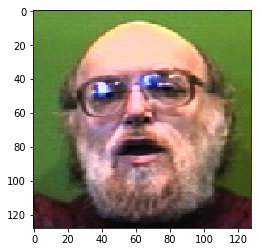

In [11]:
X_backup = X
print (len(X_backup))
plt.imshow(load_image(X[3000]), interpolation='nearest')
plt.show()

In [0]:
test = load_image(dataset_path + "male/gjnorm/gjnorm.6.jpg")

In [13]:
test.shape

(128, 128, 3)

In [14]:
BUFFER_SIZE = 2944
BATCH_SIZE = 32

print(f"Number Of Batches = {BUFFER_SIZE//BATCH_SIZE}")

Number Of Batches = 92


In [15]:
train_data = np.array(X)
np.random.shuffle(train_data)
print(len(train_data[:BUFFER_SIZE]))

train_data = np.split(train_data[:BUFFER_SIZE], BUFFER_SIZE//BATCH_SIZE)

print (f"Number Of Batches = {len(train_data)}, Batch Size = {len(train_data[0])}")

2944
Number Of Batches = 92, Batch Size = 32


In [0]:
!pip install -q pyyaml  # Required to save models in YAML format

In [0]:
def make_generator_model():
  model = tf.keras.Sequential()
  
  model = tf.keras.Sequential()

  # Encoder Layers
  model.add(layers.Conv2D(8, (5, 5), strides=2, padding='same', input_shape=(128, 128, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Conv2D(16, (5, 5), strides=2, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Conv2D(32, (5, 5), strides=2, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Conv2D(64, (5, 5), strides=2, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Conv2D(100, (4, 4), strides=2, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  ####
  
  model.add(layers.Conv2DTranspose(64, (4, 4), padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Conv2DTranspose(32, (6, 6), strides=2, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Conv2DTranspose(16, (6, 6), strides=2, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Conv2DTranspose(8, (7, 7), strides=2, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Conv2DTranspose(8, (7, 7), strides=2, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Conv2DTranspose(3, (8, 8), strides=2, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  return model
  
  
#   autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
#   autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
#   autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
#   autoencoder.add(layers.Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

#   # Flatten encoding for visualization
#   autoencoder.add(layers.Flatten())
#   autoencoder.add(layers.Reshape((4, 4, 8)))

#   # Decoder Layers
#   autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
#   autoencoder.add(layers.UpSampling2D((2, 2)))
#   autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
#   autoencoder.add(layers.UpSampling2D((2, 2)))
#   autoencoder.add(layers.Conv2D(16, (3, 3), activation='relu'))
#   autoencoder.add(layers.UpSampling2D((2, 2)))
#   autoencoder.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

#   autoencoder.summary()
  
# #   Add a densely-connected layer to the model
# #   the model will take as input arrays of shape (*, 100).
# #   And and output arrays of shape (*, 4*4*256)
  
 
# #   Output of shape 4x4x1024. We're taking input noise of shape (100,1)

#   model.add()

#   input_img = layers.Input(shape=(128, 128, 3))


  
#   model.add(layers.Dense(4*4*1024, use_bias = False, input_shape = (128, 128,3)))
  
 
#   model.add(layers.BatchNormalization())

#   model.add(layers.LeakyReLU())
  
#   model.add(layers.Reshape(( 4, 4, 1024)))
#   #print(model.output_shape)
#   #print("here 1")
#   assert model.output_shape == (None, 4, 4, 1024)
  
# #   
# #   The generator uses a transposed convolutional layer (Upsampling) layers to produce an image from seed (random noise).
  
# #   128 is the dimensionality of the output space
# #   (5,5) specifies the height and width of the 2D convolution window
  
# #   
#   model.add(layers.Conv2DTranspose(512, (5, 5), strides = (2,2), padding = "same", use_bias = False))
#   #print(model.output_shape)
#   #print("here2")
#   assert model.output_shape == (None, 8, 8, 512)
#   model.add(layers.BatchNormalization())
#   model.add(layers.LeakyReLU())
  
#   # Another transposed convolutional layer (upsampling)
#   #print("here3")
#   model.add(layers.Conv2DTranspose(256, (5,5), strides = (2,2), padding = "same", use_bias = False))
#   #print("here4")
#   assert model.output_shape == (None, 16, 16, 256)
#   model.add(layers.BatchNormalization())
#   model.add(layers.LeakyReLU())
  
#   #print("here4")
#   model.add(layers.Conv2DTranspose(128, (5,5), strides = (2,2), padding = "same", use_bias = False))
#   #print("here5")
#   assert model.output_shape == (None, 32, 32, 128)
#   model.add(layers.BatchNormalization())
#   model.add(layers.LeakyReLU())
  
  
  
#   # Final output layer also a convolutional layer (upsampling), tanh goes from -1 to 1
#   #print("here6")
#   model.add(layers.Conv2DTranspose(64, (5,5), strides = (2,2), padding = "same", use_bias = False))
#   assert model.output_shape == (None, 64, 64, 64)
#   model.add(layers.BatchNormalization())
#   model.add(layers.LeakyReLU())
  
#   model.add(layers.Conv2DTranspose(3, (5,5), strides = (2,2), padding = "same", use_bias = False, activation = "tanh"))


#   #print("here7")

  
#   print(f"model.output_shape is {model.output_shape}")
#   assert model.output_shape == (None, 128, 128, 3)
  
  
#   return model

In [0]:
generator = make_generator_model()

In [0]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same', input_shape=[128, 128, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3)) 
    
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1))

     
    return model

In [0]:
discriminator = make_discriminator_model()

In [0]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [0]:

# Discriminator Loss

# Discriminator takes inputs from image generated by generator and image from the
# real dataset. 

def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [0]:
# Generator Loss
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [0]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 8

seed = tf.random.normal([num_examples_to_generate, 128, 128, 3])



In [0]:
# Helper function to load image
def load_image( infilename ) :
    img = PIL.Image.open( infilename )
#     print ((img))
#     print (np.array(img).shape)
    img = img.resize((128, 128))
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

In [0]:
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    # take the image links and return a cropped image
    new_images = []
    #print("here1 ...")
    i = 0 
    for file_name in images:
        # print(file_name)
        # print("Hey here")
        # print(i)
        i+=1
        new_pic = load_image(file_name)
        #print("ok")
        new_images.append(new_pic)
        #print("now what")
    
    # print (f"length = {len(new_images)}")
    
    #print("here 2")
    images = np.array(new_images)
    #print("reconfiguring complete")
    # Do some reshaping
    # print(f"{images.shape} images.shape[0] = {images.shape[0]}")
    images = images.reshape(images.shape[0], 128, 128, 3).astype('float32') # puts each number in its own numpy array so instead of [1,2,3] gonna be [[1], [2], [3]]
    # print("here 3")
    images = (images - 127.5)/127.5 # Normalize the images to [-1. 1] so if it was 0 --> -1 and if it was 255 --> 1
    # print("Normalized the data")
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(images, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) # The zip() function returns an iterator of tuples based on the iterable object.
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    # free memory!
    images = None
    
    return gen_loss, disc_loss

In [0]:
generator_loss_epoch = []
discriminator_loss_epoch = []

In [0]:
checkpoint_dir = "./training_checkpoints"
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                                 discriminator_optimizer = discriminator_optimizer,
                                 generator = generator,
                                 discriminator = discriminator)

In [0]:
def train(dataset, epochs, X_data):  
  
  for epoch in range(epochs):
    start = time.time()
    batch_no = 1
    for image_batch in dataset:
      print(f"batch_no = {batch_no}")
      batch_no += 1
      g_loss, d_loss = train_step(image_batch)
      

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generator_loss_epoch.append(g_loss)
    discriminator_loss_epoch.append(d_loss)
    
    print (f"Generator Loss is {g_loss} \nDiscriminator Loss is {d_loss}")

    generate_and_save_images(generator,
                             epoch + 1,
                             np.array(X_data))
    
    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)
    
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
    
  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           np.array(X_data))

In [0]:
def generate_and_save_images(model, epoch, test_input):
  print(test_input.shape)
  predictions = model(test_input, training=False)
  fig = plt.figure(figsize=(4,4))
#   print (predictions[0], predictions[0]*255,predictions[0].shape )
  for i in range(predictions.shape[0]):
      plt.subplot(8, 8, i+1)
      plt.imshow(predictions[i])
      plt.axis('off')
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [32]:

X_data = []
for i in range(num_examples_to_generate):
    image = load_image(X[i])
    X_data.append(image.astype('float32'))

print('X_data shape:', np.array(X_data).shape, seed.shape)

X_data shape: (8, 128, 128, 3) (8, 128, 128, 3)


W0414 17:09:20.243619 140401446246272 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 17:09:20.275308 140401446246272 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 17:09:20.304497 140401446246272 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 17:09:20.335026 140401446246272 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 17:09:20.366135 140401446246272 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(8, 128, 128, 3)


W0414 17:09:20.408248 140401446246272 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 17:09:20.440234 140401446246272 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 17:09:20.858031 140401446246272 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


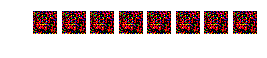

CPU times: user 26min 2s, sys: 4min 20s, total: 30min 23s
Wall time: 46min 26s


In [0]:
%%time
print(f"{len(train_data)} batches of size -> {len(train_data[0])}")

train(train_data, 50, X_data)

W0414 10:51:26.660737 140494359840640 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 10:51:26.676346 140494359840640 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 10:51:26.692762 140494359840640 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 10:51:26.707424 140494359840640 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 10:51:26.723072 140494359840640 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 10:51:26.739818 140494359840640 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0414 10:51:26.757942 140494

X_data shape: (8, 128, 128, 3) (8, 128, 128, 3)
(8, 128, 128, 3)


W0414 10:51:26.774963 140494359840640 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


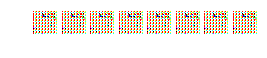

In [43]:

X_data = []
for i in range(num_examples_to_generate):
    image = load_image(X[i])
    X_data.append(image.astype('float32'))

print('X_data shape:', np.array(X_data).shape, seed.shape)
generate_and_save_images(generator,
                           50,
                           np.array(X_data))